In [1]:
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("darkgrid")

fd = pd.read_csv('spotify_data.csv')

fd.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


D:\Program\Pythonn\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
3    861
1    645
0    361
4    124
2     26
Name: count, dtype: int64


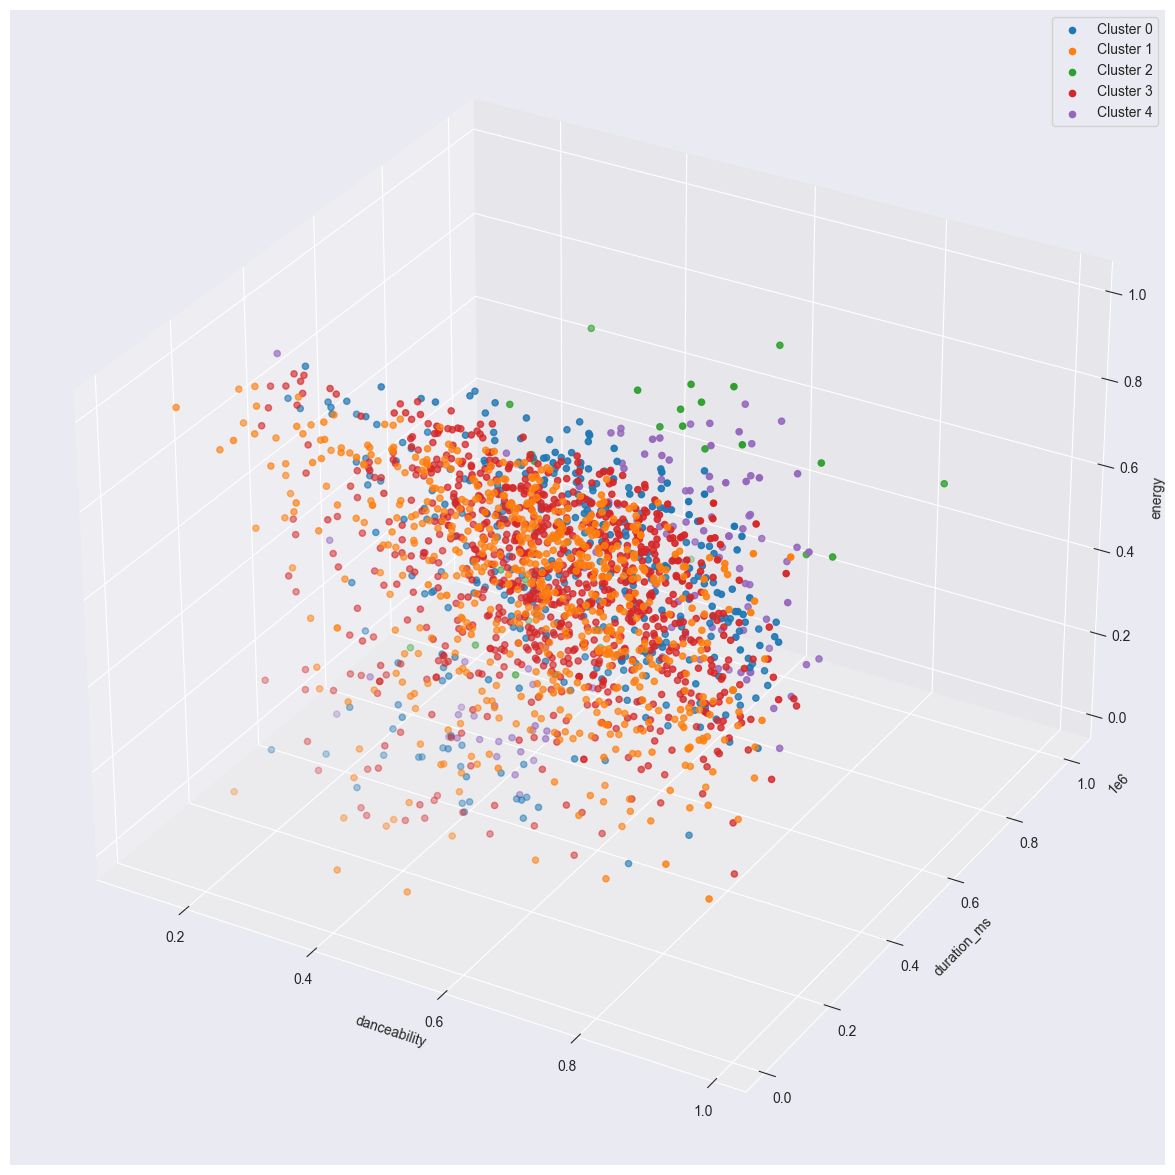

In [13]:
# Pilih fitur yang akan digunakan untuk pengelompokan (kolom 3 hingga 16)
features = fd.iloc[:, 2:16]

# Pilih fitur yang bersifat numerik saja
numerical_features = features.select_dtypes(include=[np.number])

# Tentukan jumlah cluster yang diinginkan
num_clusters = 5  # Ganti sesuai kebutuhan Anda

# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Lakukan pengelompokan
fd['cluster'] = kmeans.fit_predict(numerical_features)

# Tampilkan hasil pengelompokan
print(fd['cluster'].value_counts())

# Visualisasikan hasil pengelompokan dalam ruang 3 dimensi
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Pilih tiga fitur pertama untuk visualisasi 3D
x = numerical_features.iloc[:, 0]
y = numerical_features.iloc[:, 1]
z = numerical_features.iloc[:, 2]

# Plot setiap cluster dengan warna yang berbeda
for cluster in range(num_clusters):
    cluster_data = fd[fd['cluster'] == cluster]
    ax.scatter(cluster_data.iloc[:, 2], cluster_data.iloc[:, 3], cluster_data.iloc[:, 4], label=f'Cluster {cluster}')

# Tambahkan label sumbu
ax.set_xlabel(numerical_features.columns[0])
ax.set_ylabel(numerical_features.columns[1])
ax.set_zlabel(numerical_features.columns[2])

# Tampilkan legenda
ax.legend()

# Tampilkan plot 3D
plt.show()


In [8]:
print(numerical_features.columns)

Index(['danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence', 'target'],
      dtype='object')


In [12]:
fd.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,cluster
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,0
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,2
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,0
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,0
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,2
